# LISA Sensitivity Notebook

#### Import relevant libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import LISA_tools as LISA

## Set physical and LISA constants

In [12]:
""" Cosmological values """
H0      = 69.6      # Hubble parameter today
Omega_m = 0.286     # density parameter of matter

""" LISA arm length """
L = 2.5e9 # meters

""" Transfer Frequency """
f_star = LISA.C/(2.*np.pi*L)

""" Observation Period """
Tobs = 4.*LISA.YEAR

""" Number of Michelson Data Channels """
NC = 2

constants = np.array([H0, Omega_m, L, f_star, Tobs, NC])

## Construct, Plot, and save to dat file, the characteristic noise strain for specified observation period

Note that you may need to run the bottom cell twice (it'll error the first time due to a caching bug with matplotlib)

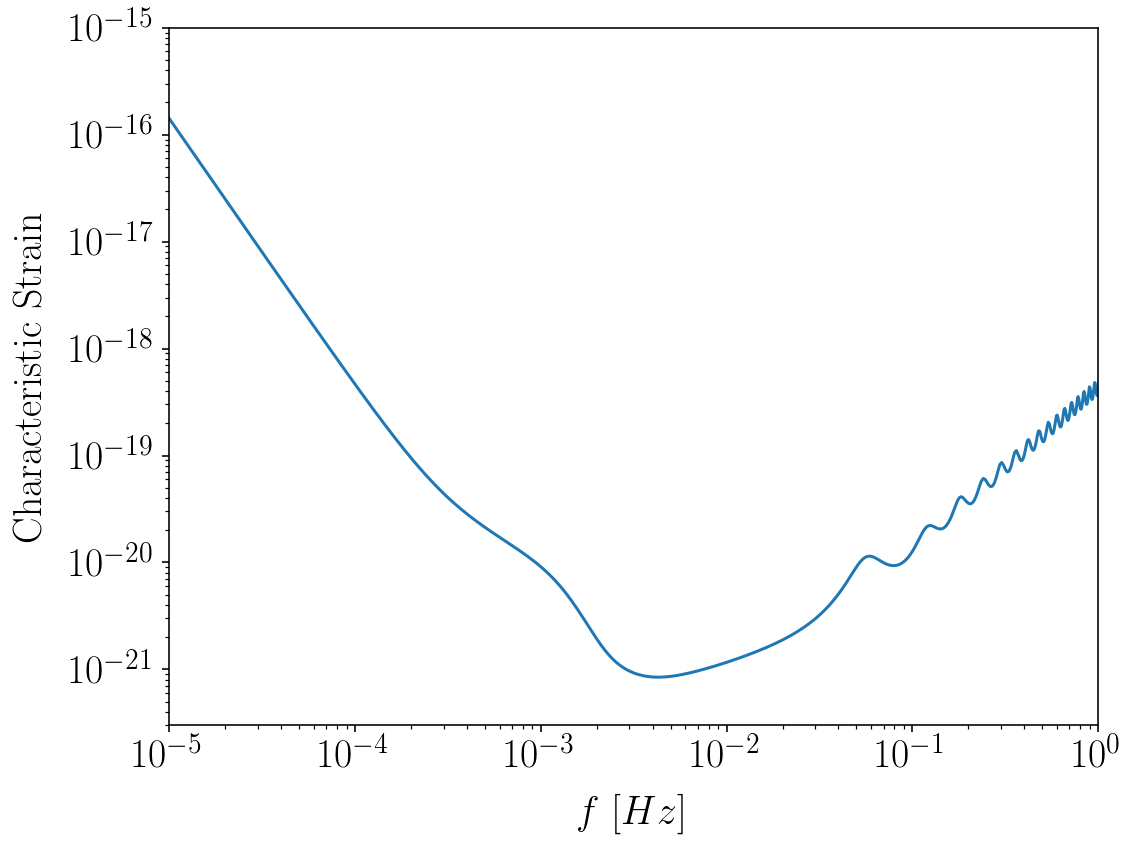

In [13]:
"""
Construct Noise curve
"""

""" Read in Transfer Function """
transfer_data = np.genfromtxt('R.txt')
f = transfer_data[:,0]*f_star # convert to frequency
R = transfer_data[:,1]*NC     # response gets improved by more data channels

"""
Calculate, Plot, and save the noise curve
"""
f, Sn = LISA.get_Sn(constants)

plt.figure(figsize=(8,6))
plt.rcParams['text.usetex'] = True
plt.ion()
plt.rc('text', usetex=True)
plt.rc('font', family='calibri')
plt.xlabel(r'$f ~[Hz]$', fontsize=20, labelpad=10)
plt.ylabel(r'Characteristic Strain$', fontsize=20, labelpad=10)
plt.tick_params(axis='both', which='major', labelsize=20)

plt.loglog(f, np.sqrt(f*Sn)) # plot the characteristic strain

%config InlineBackend.figure_format = 'retina'
plt.xlim(1.0e-5, 1.0e0)
plt.ylim(3.0e-22, 1.0e-15)
plt.tight_layout()
plt.tick_params(labelsize=20)

plt.show()

out_file = 'characteristic_noise_strain.dat'
np.savetxt(out_file,(np.vstack((f, np.sqrt(f*Sn))).T), delimiter=' ')

## Calculate Characteristic Strain, plot it appropriately, and save to dat file

### Inputs

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; m1 - component mass 1, SOURCE FRAME!  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; m2 - component mass 2, SOURCE FRAME!

#### Initial condition options (Specify one!)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; T_merger - time to merger for source  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; f_start  - start frequency for source

#### Distance options (Specify one!)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; T_merger - time to merger for source  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; f_start  - start frequency for source

## Massive Binary Black Hole

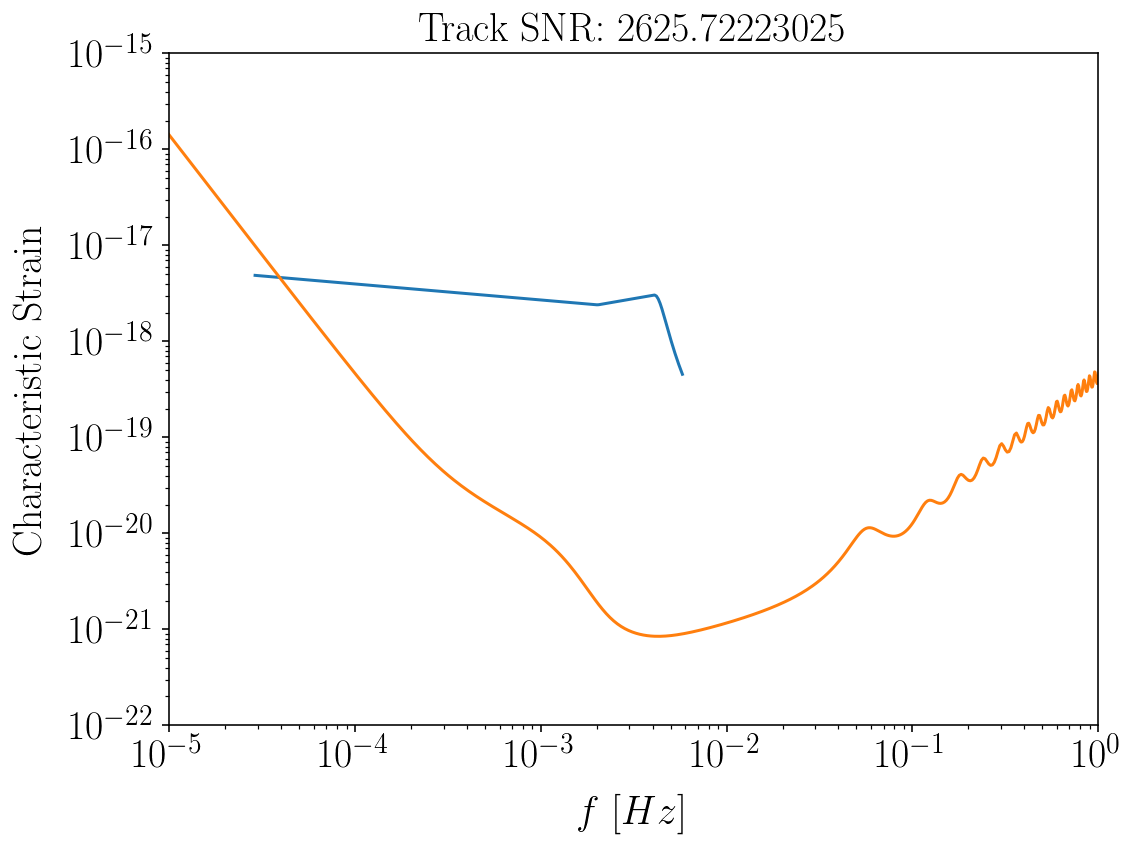

In [14]:
m1 = 0.5e6*LISA.TSUN # leading coefficient is the 
m2 = 0.5e6*LISA.TSUN #   mass in terms of solar mass

D_lum    = None         # Luminosity Distance, meters
z        = 3.           # Redshift
T_merger = 1.*LISA.YEAR # time to merger
f_start  = None         # start frequency

LISA.calculate_plot_source(m1, m2, constants, Dl=D_lum, z=z, T_merger=T_merger, f_start=f_start)

## Galactic Binary

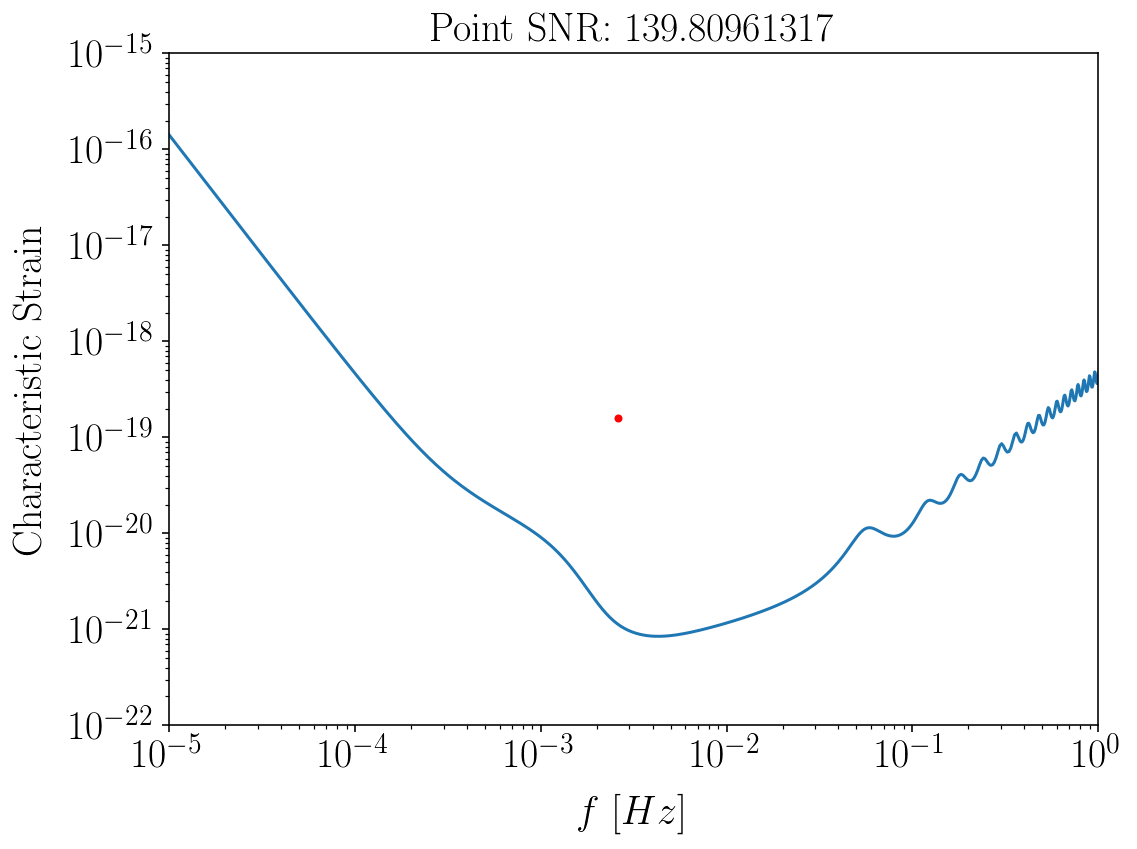

In [15]:
m1 = 0.50*LISA.TSUN        # leading coefficient is the 
m2 = 0.25*LISA.TSUN        #   mass in terms of solar mass

D_lum    = 1.0e-3*LISA.MPC # Luminosity Distance, meters
z        = None            # Redshift
T_merger = None            # time to merger
f_start  = 2.6e-3          # start frequency

LISA.calculate_plot_source(m1, m2, constants, Dl=D_lum, z=z, T_merger=T_merger, f_start=f_start)

## LIGO Binary

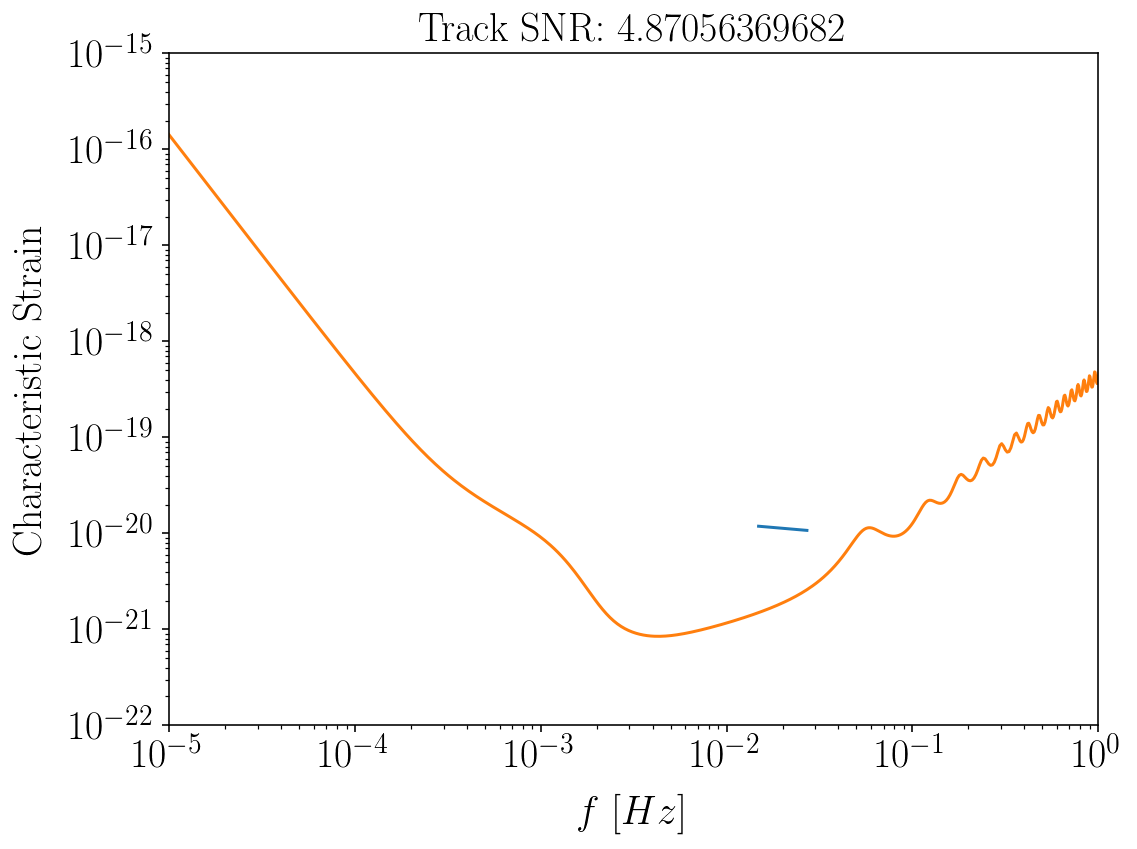

In [16]:
m1 = 36.0*LISA.TSUN # leading coefficient is the 
m2 = 29.0*LISA.TSUN #   mass in terms of solar mass

D_lum    = 410.*LISA.MPC # Luminosity Distance, meters
z        = None          # Redshift
T_merger = 5.*LISA.YEAR  # time to merger
f_start  = None          # start frequency

LISA.calculate_plot_source(m1, m2, constants, Dl=D_lum, z=z, T_merger=T_merger, f_start=f_start)